## Query Complexity

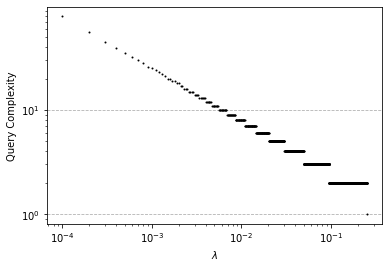

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math as ma

interval = 0.0001
lam = np.arange(interval,0.25 + interval,interval)
k_optp = np.floor(ma.pi/(4*np.arcsin(np.sqrt(lam))) - 1/2 )
k_opt = k_optp + 1
 
plt.plot(lam, k_opt, 'k.', markersize=2)
plt.xlabel('$\lambda$')
plt.ylabel('Query Complexity')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.show()

## Solving Equations

### For New Equations

In [3]:
import random
from scipy.optimize import fsolve
interval = 0.00001
data_new = []

def equations_even_k(vars):
    (th1, th2, phi) = vars
    eq1 = 1 + 4*lam*(1-2*lam)*ma.sin(th1/2)*ma.sin(th2/2)*ma.tan(k_opt*phi/2)/ma.sin(phi)
    eq2 = (1-4*lam)*ma.tan(th1/2) + ma.tan(th2/2)
    eq3 = ma.cos(phi) - ma.cos(th1/2+th2/2) - 8*lam*(1-lam)*ma.sin(th1/2)*ma.sin(th2/2)
    return [eq1, eq2, eq3]

def equations_odd_k(vars):
    (th1, th2, phi) = vars
    eq1 = 1 - 2*lam + 2*ma.cos(th1)*lam + ( (2 - ma.cos(th1) + (2*ma.cos(th1) - 2)*lam)*4*lam*(1-2*lam)*ma.sin(th1/2)*ma.sin(th2/2) - 2*lam*ma.sin(th1)*ma.sin(th1/2-th2/2) )*ma.tan((k_opt-1)*phi/2)/ma.sin(phi)
    eq2 = 2*lam*ma.sin(th1) + (2*lam*ma.cos(th1)*ma.sin(th1/2-th2/2) - 4*(1-2*lam)*(1-2*lam)*lam*ma.sin(th1)*ma.sin(th1/2)*ma.sin(th2/2) - (1-2*lam)*ma.sin(th1/2+th2/2) )*ma.tan((k_opt-1)*phi/2)/ma.sin(phi)
    eq3 = ma.cos(phi) - ma.cos(th1/2+th2/2) - 8*lam*(1-lam)*ma.sin(th1/2)*ma.sin(th2/2)
    return [eq1, eq2, eq3]



for i in range( int(0.25/interval) ):
    #print( i+1, (i+1)*interval )
    lam = (i+1)*interval
    k_opt = np.floor(ma.pi/(4*np.arcsin(np.sqrt(lam))) - 1/2 ) + 1
    
    if k_opt%2 == 0: #even
        root = fsolve(equations_even_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
        while np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[0] == False or np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[1] == False or np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[2] == False:
            root = fsolve(equations_even_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
            
        data_new.append([i+1, lam, k_opt, root[0], root[1], root[2]])
    

    else: #odd
        root = fsolve(equations_odd_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
        while np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[0] == False or np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[1] == False or np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[2] == False:
            root = fsolve(equations_odd_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
            
        data_new.append([i+1, lam, k_opt, root[0], root[1], root[2]])



C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 800.
  warnings.warn(msg, RuntimeWarning)


### For Original Equations

In [6]:
import random

interval = 0.00001
data_original = []

def equations_even_k(vars):
    (th1, th2, phi) = vars
    eq1 = 1 + 4*lam*(1-2*lam)*ma.sin(th1/2)*ma.sin(th2/2)*ma.tan(k_opt*phi/2)/ma.sin(phi)
    eq2 = (1-4*lam)*ma.tan(th1/2) + ma.tan(th2/2)
    eq3 = ma.cos(phi) - ma.cos(th1/2+th2/2) - 8*lam*(1-lam)*ma.sin(th1/2)*ma.sin(th2/2)
    return [eq1, eq2, eq3]

def equations_odd_k(vars):
    (th1, th2, phi) = vars
    eq1 = 2*lam + (1-2*lam)*ma.cos(th1) - (1-2*lam)*ma.sin(th1/2)*( ma.sin(th1)*ma.cos(th2/2) + (1+4*lam-8*lam*lam + (1-8*lam+8*lam*lam)*ma.cos(th1))*ma.sin(th2/2) )*ma.tan((k_opt-1)/2*phi)/ma.sin(phi)
    eq2 = (1-2*lam)*ma.sin(th1) + ( (1-2*lam)*(8*lam*(1-lam)*ma.sin(th1/2)*ma.sin(th1)*ma.sin(th2/2) + ma.cos(th1)*ma.sin(th1/2+th2/2)) - 2*lam*ma.sin(th1/2-th2/2) )*ma.tan((k_opt-1)/2*phi)/ma.sin(phi)
    eq3 = ma.cos(phi) - ma.cos(th1/2+th2/2) - 8*lam*(1-lam)*ma.sin(th1/2)*ma.sin(th2/2)
    return [eq1, eq2, eq3]


for i in range( int(0.25/interval) ):
    #print( i+1, (i+1)*interval )
    lam = (i+1)*interval
    k_opt = np.floor(ma.pi/(4*np.arcsin(np.sqrt(lam))) - 1/2 ) + 1
    
    if k_opt%2 == 0: #even
        root = fsolve(equations_even_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
        while np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[0] == False or np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[1] == False or np.isclose(equations_even_k(root), [0.0, 0.0, 0.0])[2] == False:
            root = fsolve(equations_even_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
            
        data_original.append([i+1, lam, k_opt, root[0], root[1], root[2]])
    

    else: #odd
        root = fsolve(equations_odd_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
        while np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[0] == False or np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[1] == False or np.isclose(equations_odd_k(root), [0.0, 0.0, 0.0])[2] == False:
            root = fsolve(equations_odd_k, [random.random()*ma.pi, random.random()*ma.pi, random.random()*ma.pi])
            
        data_original.append([i+1, lam, k_opt, root[0], root[1], root[2]])

    


## Difference Between Two Solutions

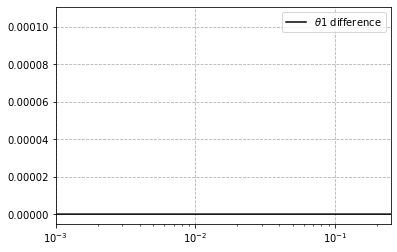

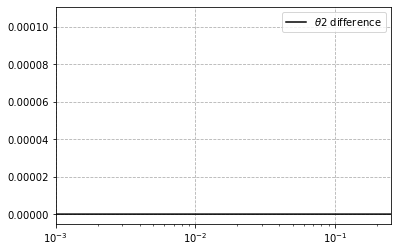

In [7]:
diff_theta1 = []
diff_theta2 = []

lam = []

for i in range( len(data_original) ):
    lam_temp = data_original[i][1]
    lam.append( lam_temp )
    
    if data_original[i][3]%(2*ma.pi) > ma.pi:
        theta1_original = (data_original[i][3]%(2*ma.pi) - 2*ma.pi) / ma.pi
    else:
        theta1_original = (data_original[i][3]%(2*ma.pi))/ma.pi
    
    if data_new[i][3]%(2*ma.pi) > ma.pi:
        theta1_new = (data_new[i][3]%(2*ma.pi) - 2*ma.pi) / ma.pi
    else:
        theta1_new = (data_new[i][3]%(2*ma.pi))/ma.pi
    
    diff_theta1.append(abs(abs(theta1_original) - abs(theta1_new)))
    
    if data_original[i][4]%(2*ma.pi) > ma.pi:
        theta2_original= -(data_original[i][4]%(2*ma.pi) - 2*ma.pi)/ma.pi    
    else:
        theta2_original = -(data_original[i][4]%(2*ma.pi))/ma.pi
    
    if data_new[i][4]%(2*ma.pi) > ma.pi:
        theta2_new= -(data_new[i][4]%(2*ma.pi) - 2*ma.pi)/ma.pi    
    else:
        theta2_new = -(data_new[i][4]%(2*ma.pi))/ma.pi
    
    diff_theta2.append(abs(abs(theta2_original) - abs(theta2_new)))

plt.figure(1)
plt.plot(lam,diff_theta1,'k',label='$\\theta1$ difference')
plt.xlim(0.001, 0.25)
plt.xscale('log')
plt.grid(True, linestyle='--')
plt.legend()

plt.figure(2)
plt.plot(lam,diff_theta2,'k',label='$\\theta2$ difference')
plt.xlim(0.001, 0.25)
plt.xscale('log')
plt.grid(True, linestyle='--')
plt.legend()

## Computing Success Probability (New Equations)

In [4]:
import cmath as cma

lam = []
theta1 = []
theta2 = []
success_prob = []

for i in range( len(data_new) ):
    
    # Rearrange the value of thetas
    lam_temp = data_new[i][1]
    lam.append( lam_temp )
    k_opt_temp = data_new[i][2]
    
    if data_new[i][3]%(2*ma.pi) > ma.pi:
        theta1_temp = (data_new[i][3]%(2*ma.pi) - 2*ma.pi)/ma.pi
    else:
        theta1_temp = (data_new[i][3]%(2*ma.pi))/ma.pi
    theta1.append( theta1_temp )    
    
    if data_new[i][4]%(2*ma.pi) > ma.pi:
        theta2_temp= -(data_new[i][4]%(2*ma.pi) - 2*ma.pi)/ma.pi    
    else:
        theta2_temp = -(data_new[i][4]%(2*ma.pi))/ma.pi
    theta2.append( theta2_temp )
        
    # Compute the success probability
    S1 = [[1,0],[0,-1]] # Phase flip with fixed angle
    def S2(x,lamd):
        return [[1-(1-cma.exp(1j*x))*lamd,(1-cma.exp(1j*x))*ma.sqrt(lamd*(1-lamd))],[(1-cma.exp(1j*x))*ma.sqrt(lamd*(1-lamd)),1-(1-cma.exp(1j*x))*(1-lamd)]]
        
        
        
    G1 = -np.matmul(S2(data_new[i][3],lam_temp),S1)
    G2 = -np.matmul(S2(data_new[i][4],lam_temp),S1)
    G = np.matmul(G2,G1) 
                    
    state = [ ma.sqrt(1-lam_temp), ma.sqrt(lam_temp) ]
    
    if k_opt_temp%2 == 0: #even
        for r in range( int(k_opt_temp/2) ):
            state = np.matmul(G,state)
        success_prob.append( abs(np.matmul([0,1], state))**2 )
    
    else: #odd
        for r in range( int((k_opt_temp-1)/2) ):
            state = np.matmul(G,state)
        state = np.matmul(G1,state)
        success_prob.append( abs(np.matmul([0,1], state))**2 )
        



## Figure: Solutions (New Equations)

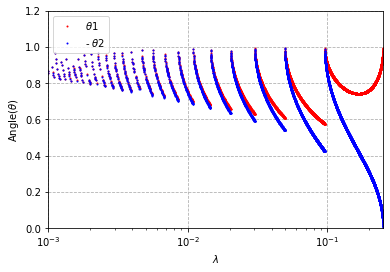

In [5]:
plt.figure()
plt.plot(lam, theta1,'r.', markersize=2, label='$\\theta1$')
plt.plot(lam, theta2,'b.', markersize=2, label='- $\\theta2$')
plt.xlabel('$\lambda$')
plt.ylabel('Angle($\\theta$)')

plt.xlim(0.001, 0.25)
plt.ylim(0, 1.2)
plt.xscale('log')
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

## Figure: Success Probability (New Equations)

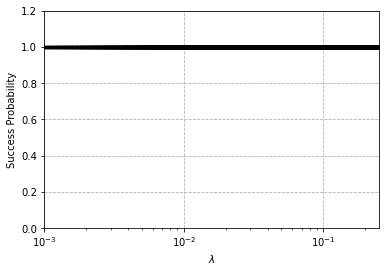

In [9]:
plt.figure()
plt.plot(lam, success_prob,'k.', markersize=5)
plt.xlabel('$\lambda$')
plt.ylabel('Success Probability')

plt.xlim(0.001, 0.25)
plt.ylim(0.0, 1.2)
plt.xscale('log')
plt.grid(True, linestyle='--')
plt.show()